## DATASET B

In [1]:
import os

import keras
import numpy as np
import pandas as pd
# from keras.saving import load_model
from bayesflow.adapters import Adapter

# ---------------- Configuration ----------------
PARAM_NAMES = ['v_base', 'a_init', 't_nd', 'leak', 'collapse_rate', 'gamma', 'sigma_cpp', 'sigma_n200']
CHECKPOINT_PATH = './checkpoints_unified_joint/unified_joint_model_final.keras'
REAL_DATA_CSV = r"D:\python\mtcode\data2features_combined\sub-04_task-wordchoice_combined.csv"

# ---------------- Load and Prepare Real Data ----------------
df = pd.read_csv(REAL_DATA_CSV)
summary_vars = df[['RT', 'Choice_Correct', 'CPP_Slope', 'N200_Latency']].to_numpy(dtype=np.float32)
summary_vars = summary_vars[~np.isnan(summary_vars).any(axis=1)]
summary_vars = summary_vars.reshape(1, *summary_vars.shape)  # [1, n_trials, n_features]

# ---------------- Rebuild Adapter ----------------
adapter = Adapter() \
    .to_array() \
    .convert_dtype('float64', 'float32') \
    .standardize('summary_variables') \
    .keep(['summary_variables'])

# Adapt real data (simulate what would happen in the workflow)
conditions = adapter({'summary_variables': summary_vars})

# ---------------- Load Trained Amortizer ----------------
approximator = keras.saving.load_model(CHECKPOINT_PATH)

# ---------------- Run Inference ----------------
posteriors = approximator.sample(conditions=conditions, num_samples=1000)

# ---------------- Process and Print Results ----------------
posterior_array = np.stack([posteriors[k] for k in PARAM_NAMES], axis=-1)  # [1, 1000, 9]
mean_estimates = posterior_array.mean(axis=1)[0]

# Squeeze the full posterior array to remove singleton dimensions
posterior_array = np.squeeze(posterior_array)           # (1000, 9)
mean_estimates = posterior_array.mean(axis=0)           # (9,)

# Print each parameter estimate
print("\nPosterior Mean Estimates:")
for name, val in zip(PARAM_NAMES, mean_estimates):
    print(f"{name:>15}: {val:.4f}")




INFO:bayesflow:Using backend 'tensorflow'
D:\myanaconda\envs\TORCHGPU3\lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 1 variables whereas the saved optimizer has 397 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))



Posterior Mean Estimates:
         v_base: -3.0552
         a_init: 1.3891
           t_nd: 0.0903
           leak: 0.9785
  collapse_rate: 0.5713
          gamma: -0.0350
      sigma_cpp: 4.8854
     sigma_n200: 0.0224


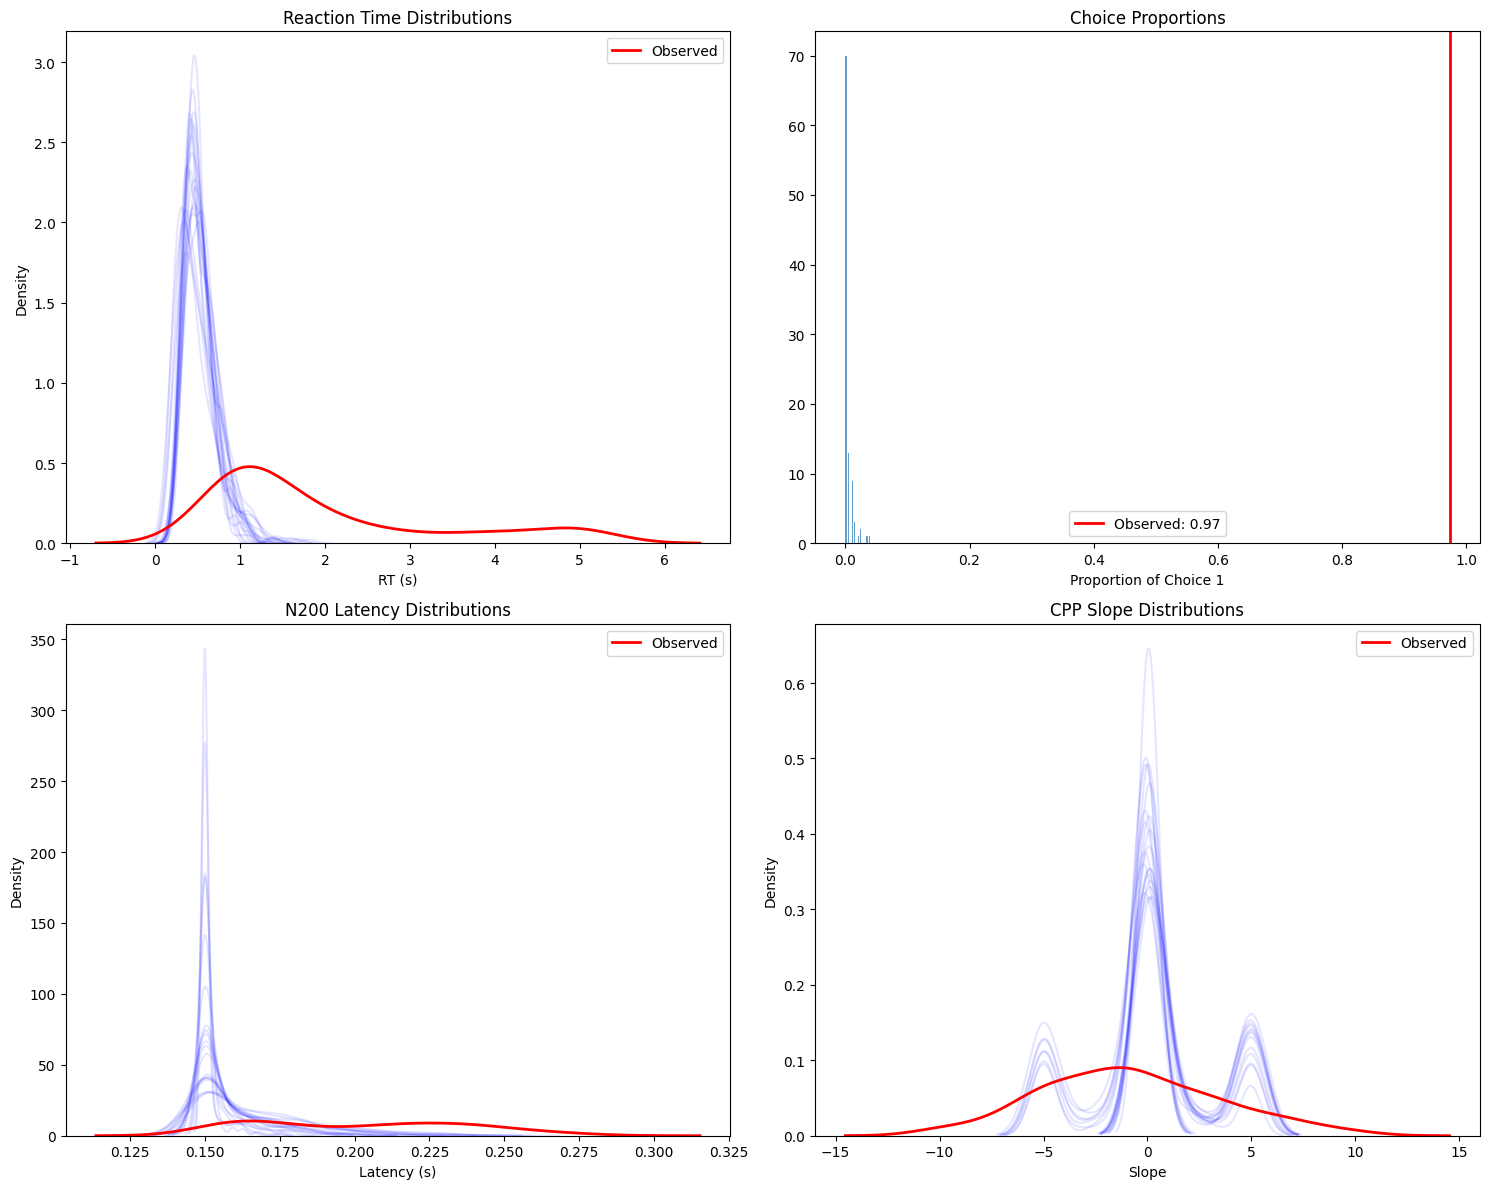


Summary Statistics Comparison:
Measure           Observed   Predicted (Mean)                    95% CI
----------------------------------------------------------------------
RT Mean              1.947              0.513            [0.448, 0.637]
Choice Prop          0.973              0.003            [0.000, 0.025]
N200 Latency         0.202              0.157            [0.150, 0.166]
CPP Slope           -0.856              0.204           [-1.731, 1.777]


In [2]:
from posterior_predictive_check import posterior_predictive_check
from EEGGDDMGPT5_new import likelihood as likelihood_fn
param_names = ['v_base', 'a_init', 't_nd', 'leak', 'collapse_rate', 'gamma', 'sigma_cpp', 'sigma_n200']
posterior_samples = np.stack([posteriors[k] for k in param_names], axis=-1)
posterior_samples = np.squeeze(posterior_samples)  # shape (n_samples, n_params)
import pandas as pd
df = pd.read_csv(r"D:\python\mtcode\data2features_combined\sub-04_task-wordchoice_combined.csv")

real_data_dict = {
    'behavioral_data': df[['RT', 'Choice_Correct']].dropna().to_numpy(),
    'eeg_data': df[['N200_Latency', 'CPP_Slope']].dropna().to_numpy()
}

posterior_predictive_check(
    posterior_samples,   # shape (n_samples, n_params)
    param_names,         # list of parameter names
    likelihood_fn,       # your model’s likelihood function
    real_data_dict       # {'behavioral_data': ..., 'eeg_data': ...}
)


## DATASET A

In [3]:

REAL_DATA_CSV = r'D:\python\mtcode\data1EA\behaviour_eeg_ea\sub24_eeg_behavioral_features.csv'
CHECKPOINT_PATH = './checkpoints_unified_joint/unified_joint_model_final.keras'
# ---------------- Load and Prepare Real Data ----------------
df = pd.read_csv(REAL_DATA_CSV)
summary_vars = df[['RT', 'Choice_Correct', 'CPP_Slope', 'N200_Latency']].to_numpy(dtype=np.float32)
summary_vars = summary_vars[~np.isnan(summary_vars).any(axis=1)]
summary_vars = summary_vars.reshape(1, *summary_vars.shape)  # [1, n_trials, n_features]

# ---------------- Rebuild Adapter ----------------
adapter = Adapter() \
    .to_array() \
    .convert_dtype('float64', 'float32') \
    .standardize('summary_variables') \
    .keep(['summary_variables'])

# Adapt real data (simulate what would happen in the workflow)
conditions = adapter({'summary_variables': summary_vars})

# ---------------- Load Trained Amortizer ----------------
approximator = keras.saving.load_model(CHECKPOINT_PATH)

# ---------------- Run Inference ----------------
posteriors = approximator.sample(conditions=conditions, num_samples=1000)

# ---------------- Process and Print Results ----------------
posterior_array = np.stack([posteriors[k] for k in PARAM_NAMES], axis=-1)  # [1, 1000, 9]
mean_estimates = posterior_array.mean(axis=1)[0]

# Squeeze the full posterior array to remove singleton dimensions
posterior_array = np.squeeze(posterior_array)           # (1000, 9)
mean_estimates = posterior_array.mean(axis=0)           # (9,)

# Print each parameter estimate
print("\nPosterior Mean Estimates:")
for name, val in zip(PARAM_NAMES, mean_estimates):
    print(f"{name:>15}: {val:.4f}")




D:\myanaconda\envs\TORCHGPU3\lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 1 variables whereas the saved optimizer has 397 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))



Posterior Mean Estimates:
         v_base: -3.0736
         a_init: 1.3981
           t_nd: 0.0913
           leak: 0.9854
  collapse_rate: 0.5685
          gamma: -0.0516
      sigma_cpp: 4.8713
     sigma_n200: 0.0220


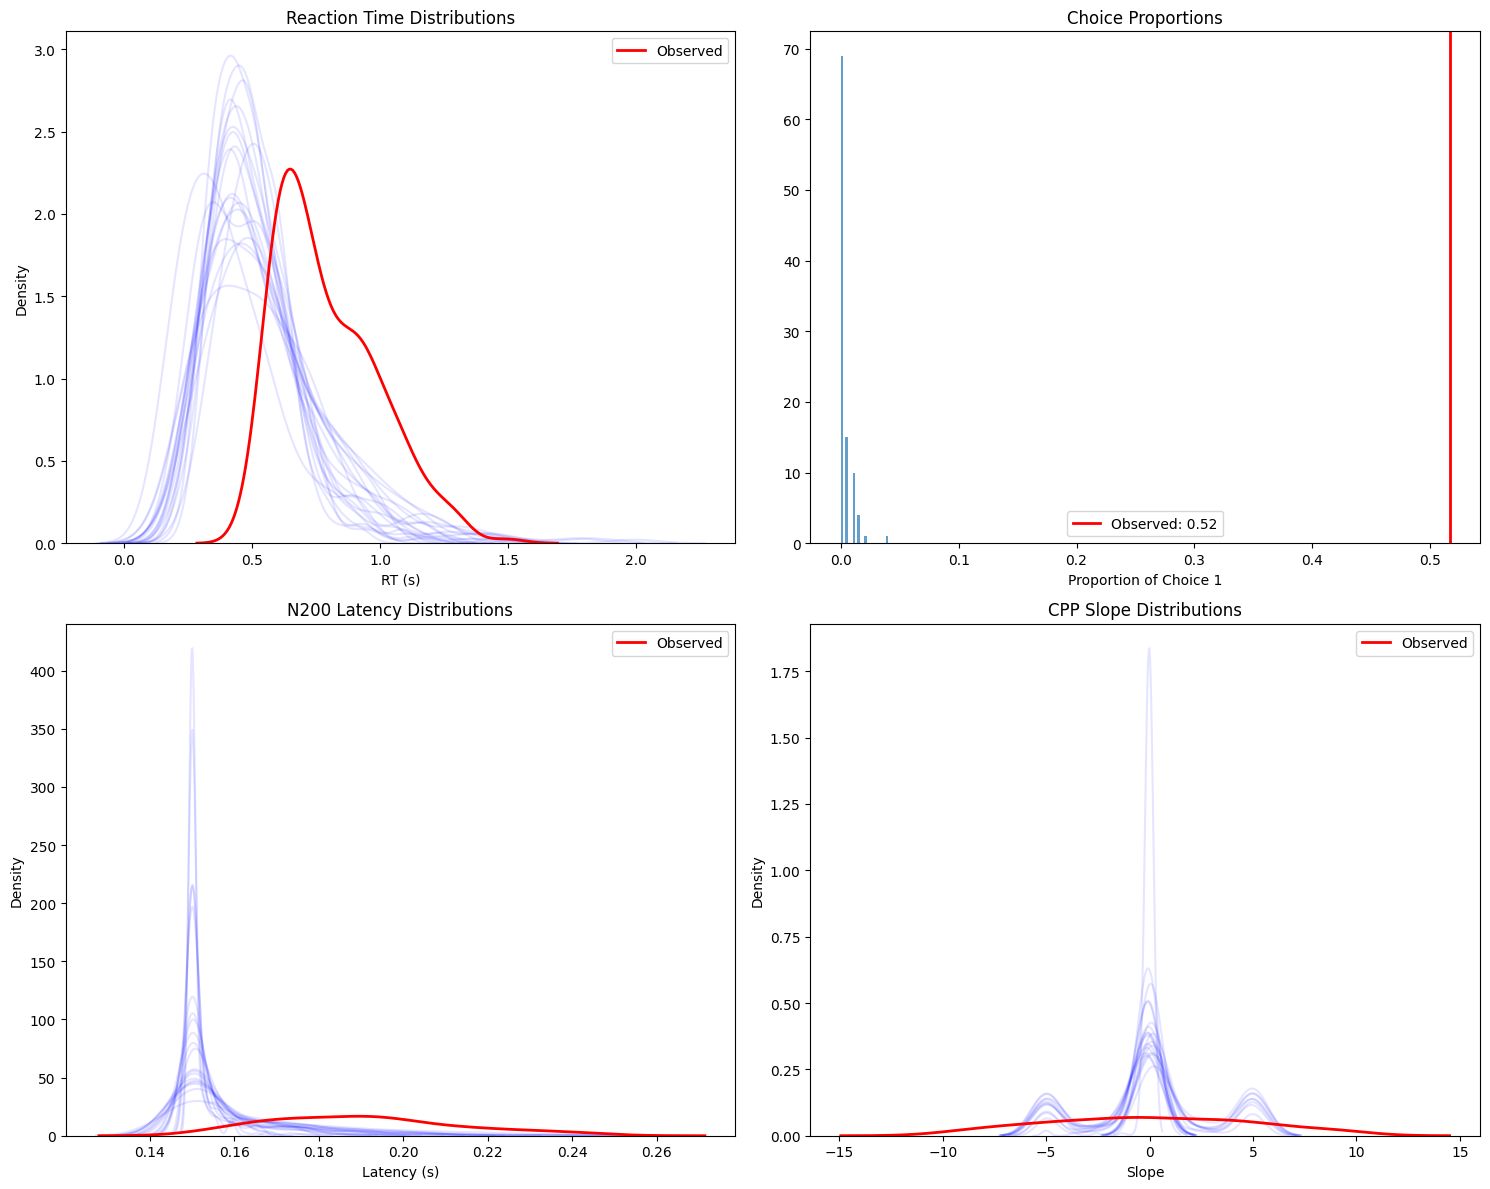


Summary Statistics Comparison:
Measure           Observed   Predicted (Mean)                    95% CI
----------------------------------------------------------------------
RT Mean              0.793              0.520            [0.429, 0.610]
Choice Prop          0.516              0.003            [0.000, 0.015]
N200 Latency         0.191              0.157            [0.151, 0.166]
CPP Slope            0.009             -0.066           [-1.918, 1.865]


In [4]:
from posterior_predictive_check import posterior_predictive_check
from EEGGDDMGPT5_new import likelihood as likelihood_fn
param_names = ['v_base', 'a_init', 't_nd', 'leak', 'collapse_rate', 'gamma', 'sigma_cpp', 'sigma_n200']
posterior_samples = np.stack([posteriors[k] for k in param_names], axis=-1)
posterior_samples = np.squeeze(posterior_samples)  # shape (n_samples, n_params)
import pandas as pd
df = pd.read_csv(r"D:\python\mtcode\data1EA\behaviour_eeg_ea\sub24_eeg_behavioral_features.csv")

real_data_dict = {
    'behavioral_data': df[['RT', 'Choice_Correct']].dropna().to_numpy(),
    'eeg_data': df[['N200_Latency', 'CPP_Slope']].dropna().to_numpy()
}

posterior_predictive_check(
    posterior_samples,   # shape (n_samples, n_params)
    param_names,         # list of parameter names
    likelihood_fn,       # your model’s likelihood function
    real_data_dict       # {'behavioral_data': ..., 'eeg_data': ...}
)
